In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

In [22]:
def power_method(A, x, maxiter):
    eigs = np.zeros(maxiter)
    eigv = np.zeros((len(x), maxiter))

    for i in range(maxiter):
        y = A @ x
        ynorm = np.linalg.norm(y,np.inf)
        x = y / ynorm
        
        eigs[i] = ynorm
        eigv[:,i] = x
        
    return x, eigs, eigv

# Test 1

In [42]:
n = 12
x = np.linspace(0,1,n)
X = np.zeros((n,n))
for i in range(n):
    X[:,i] = x**i
A = np.linalg.inv(X) @ np.diag(np.arange(1,n+1)) @ X

x, eigs, eigv = power_method(A, np.random.rand(A.shape[0]), 1000)

In [43]:
eigs

array([ 13.34105466, 168.69675375,  54.02063997,  36.18382685,
        28.91165173,  25.05882227,  22.53830573,  20.71084762,
        19.34021256,  18.29575749,  17.48578153,  16.84112842,
        16.31108628,  15.86087204,  15.46826491,  15.11983308,
        14.80761982,  14.52673278,  14.2738344 ,  14.04631296,
        13.84188428,  13.65843058,  13.49395342,  13.34657237,
        13.2145364 ,  13.0962338 ,  12.99019657,  12.89509892,
        12.80975136,  12.73309186,  12.66417542,  12.60216312,
        12.54631123,  12.49596084,  12.45052827,  12.40949636,
        12.37240658,  12.33885209,  12.30847152,  12.28094354,
        12.25598213,  12.23333231,  12.21276654,  12.19408152,
        12.17709532,  12.161645  ,  12.1475844 ,  12.1347823 ,
        12.12312072,  12.1124935 ,  12.10280499,  12.09396896,
        12.08590754,  12.07855039,  12.07183392,  12.06570055,
        12.06009815,  12.05497945,  12.0503016 ,  12.04602567,
        12.04211633,  12.03854146,  12.03527186,  12.03

In [41]:
[(11/12)**k for k in range(100)]

[1.0,
 0.9166666666666666,
 0.8402777777777777,
 0.7702546296296295,
 0.7060667438271604,
 0.6472278485082303,
 0.5932921944658778,
 0.543851178260388,
 0.4985302467386889,
 0.45698605951046484,
 0.41890388788459276,
 0.38399523056087664,
 0.3519956280141369,
 0.3226626590129588,
 0.29577410409521226,
 0.2711262620872779,
 0.24853240691333806,
 0.2278213730038932,
 0.2088362585869021,
 0.1914332370379936,
 0.17548046728482744,
 0.16085709501109183,
 0.14745233709350083,
 0.13516464233570907,
 0.12390092214106666,
 0.11357584529597776,
 0.10411119152131294,
 0.09543525889453687,
 0.08748232065332545,
 0.08019212726554834,
 0.0735094499934193,
 0.06738366249396768,
 0.06176835728613705,
 0.05662099417895895,
 0.05190257799737904,
 0.04757736316426412,
 0.04361258290057544,
 0.03997820099219415,
 0.03664668424284464,
 0.03359279388927425,
 0.030793394398501393,
 0.028227278198626277,
 0.02587500501540742,
 0.0237187545974568,
 0.0217421917143354,
 0.019930342404807448,
 0.0182694805377401

# Test 2

In [71]:
n = 10
X = np.random.rand(n,n)
A = X @ np.diag(np.arange(1,n+1)) @ np.linalg.inv(X)

x0 = np.random.rand(10)
#x0 = X[:,:-1].sum(axis=1)

x, eigs, eigv = power_method(A, x0, 50)

In [72]:
eigs

array([16.33855291, 12.2095466 , 10.62056723,  9.8966536 ,  9.54959081,
        9.3881064 ,  9.32410689,  9.31312772,  9.33111489,  9.36440685,
        9.40502954,  9.44829962,  9.49150768,  9.53314828,  9.57244986,
        9.60908113,  9.64296689,  9.67417346,  9.70283898,  9.72913237,
        9.75323012,  9.7753042 ,  9.79551638,  9.81401618,  9.83094083,
        9.84641605,  9.86055715,  9.87347022,  9.88525312,  9.8959964 ,
        9.90578398,  9.91469375,  9.92279804,  9.93016399,  9.9368539 ,
        9.94292551,  9.94843227,  9.95342356,  9.95794495,  9.96203841,
        9.96574254,  9.96909279,  9.97212162,  9.97485877,  9.97733141,
        9.98078025,  9.99506515,  9.99556293,  9.99601004,  9.99641174])

# Test 3

In [84]:
n = 10
X = np.random.rand(n,n)
diag = np.arange(1,n+1)
diag[-2] = -10
D = np.diag(diag)
A = X @ D @ np.linalg.inv(X)

x0 = np.random.rand(10)

x, eigs, eigv = power_method(A, x0, 10)

In [85]:
eigs

array([74.12553992,  6.76525032, 11.83730861,  6.03977974, 13.34480555,
        4.9650088 , 17.03067305,  3.94773188, 22.43704311,  3.70134936])

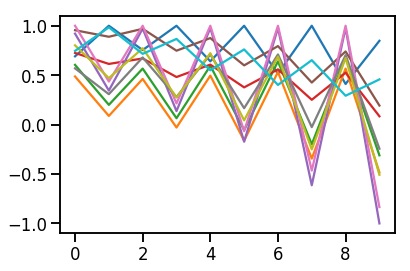

In [86]:
plt.plot(eigv.T)

# Test 4

In [92]:
n = 5
A = np.random.rand(n,n)

x0 = np.random.rand(5)

x, eigs, eigv = power_method(A, x0, 10)

In [96]:
eigs

array([2.05506161, 2.87619385, 2.83449618, 2.85141246, 2.85318249,
       2.85250409, 2.85248388, 2.85251414, 2.85251326, 2.85251208])

In [97]:
x

array([0.56144714, 1.        , 0.84366798, 0.70490485, 0.86592706])

In [95]:
np.linalg.eig(A)

(array([ 2.85251222+0.j        , -0.08635389+0.57135692j,
        -0.08635389-0.57135692j, -0.18157314+0.j        ,
         0.28230573+0.j        ]),
 array([[-0.3103046 +0.j        ,  0.66286551+0.j        ,
          0.66286551-0.j        ,  0.18438376+0.j        ,
         -0.46154895+0.j        ],
        [-0.55268706+0.j        , -0.04509647-0.17337419j,
         -0.04509647+0.17337419j, -0.27676777+0.j        ,
         -0.4554827 +0.j        ],
        [-0.46628438+0.j        , -0.15125969+0.43668723j,
         -0.15125969-0.43668723j, -0.80268855+0.j        ,
          0.06218986+0.j        ],
        [-0.38959177+0.j        , -0.48703024+0.10061919j,
         -0.48703024-0.10061919j,  0.46630707+0.j        ,
          0.14514438+0.j        ],
        [-0.47858667+0.j        , -0.10490195-0.23793842j,
         -0.10490195+0.23793842j,  0.16628603+0.j        ,
          0.74469699+0.j        ]]))

# Test 5

In [156]:
n = 10
X = np.random.rand(n,n)
diag = np.arange(1,n+1)
diag[-2] = 8
D = np.diag(diag)
A = X @ D @ np.linalg.inv(X)

x0 = np.random.rand(10)

x, eigs, eigv = power_method(A, x0, 100)

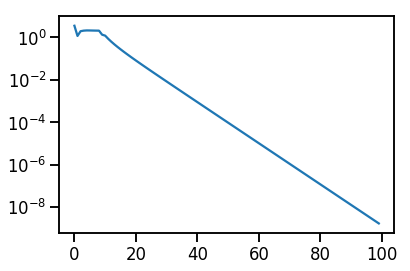

In [157]:
plt.semilogy(np.abs(eigs-10))

In [158]:
n = 10
X = np.random.rand(n,n)
diag = np.arange(1,n+1)
diag[-2] = 9
D = np.diag(diag)
A = X @ D @ np.linalg.inv(X)

x0 = np.random.rand(10)

x, eigs, eigv = power_method(A, x0, 100)

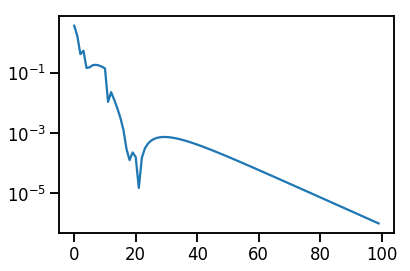

In [159]:
plt.semilogy(np.abs(eigs-10))

# Test 6

Shift!

In [168]:
n = 10
X = np.random.rand(n,n)
diag = np.arange(1,n+1)
diag[-2] = 9
D = np.diag(diag)
A = X @ D @ np.linalg.inv(X)

x0 = np.random.rand(10)

x, eigs, eigv = power_method(A - 5*np.eye(n), x0, 100)

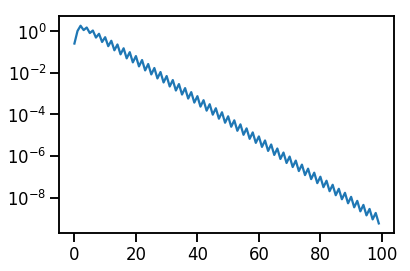

In [169]:
plt.semilogy(np.abs(eigs-(10-5)))